# **Space X  Falcon 9 First Stage Landing Prediction**


## Objectives


- Utilize various Machine Learning algorithms to predict the outcome of the landing of the Falcon 9 first stage and find the best model for the given dataset.

- Hyperparameter tuning for the best model.

- Model Evaluation and deployment.


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "Plots the confusion matrix"

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax) # annot=True is to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


In [3]:
data = pd.read_csv("data_falcon9_3.csv")

data.head()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,525.000000,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,677.000000,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,500.000000,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3170.000000,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
data = data.astype(float)
data.head()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
Y = data['Class']
Y.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
7    1.0
8    0.0
9    0.0
Name: Class, dtype: float64

In [6]:
X = data.drop(['Class'], axis=1)
X.head(10)

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3325.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2296.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1316.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4535.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4428.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standardize the Data


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [7]:
transform = preprocessing.StandardScaler()

In [8]:
X = transform.fit_transform(X)


In [9]:
type(X), type(Y)

(numpy.ndarray, pandas.core.series.Series)

## Test-Train Split and GridCV Search


We split the data into training and testing data using the  function train_test_split.  
The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function GridSearchCV.


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [11]:
Y_test.shape, X_test.shape

((18,), (18, 79))

### Logistic Regression

In [12]:
parameters ={"C":[0.01,0.1,1], 'solver':['lbfgs', 'sag', 'saga']}
lr=LogisticRegression(max_iter=1000)

logreg_cv=GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1],
                         'solver': ['lbfgs', 'sag', 'saga']})

We output the GridSearchCVobject for logistic regression. We display the best parameters using the data attribute best_params\_ and the accuracy on the validation data using the data attribute best_score\_.


In [13]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


Calculate the accuracy on the test data using the method score:


In [14]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
logreg_accuracy

0.8333333333333334

Lets look at the confusion matrix:


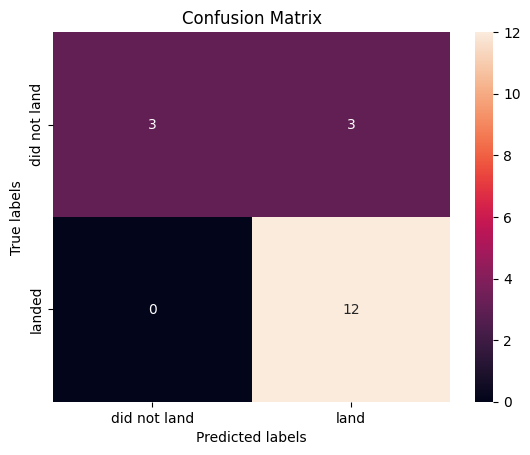

In [15]:
logreg_yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, logreg_yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


### Support Vector Machine


In [16]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [17]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [18]:
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


In [19]:
svm_accuracy = svm_cv.score(X_test, Y_test)
svm_accuracy

0.8333333333333334

We can plot the confusion matrix


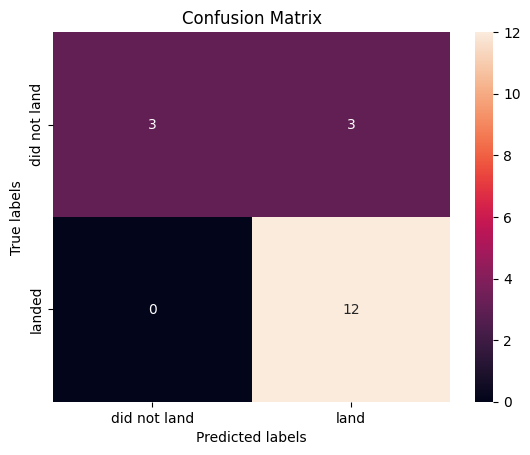

In [20]:
svm_yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, svm_yhat)

### Decision Tree

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [1000],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [22]:
tree_cv = GridSearchCV(tree, parameters, cv=10, error_score='raise')
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1000],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 1000, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8321428571428571


In [24]:
tree_accuracy = tree_cv.score(X_test, Y_test)
tree_accuracy

0.7222222222222222

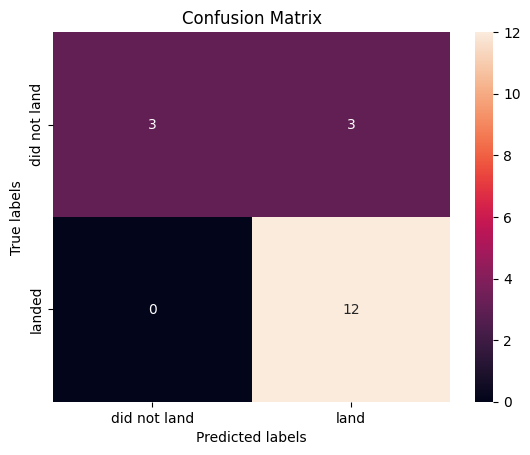

In [25]:
tree_yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, tree_yhat)

### K-Nearest Neighbors


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [27]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [28]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


In [29]:
knn_accuracy = knn_cv.score(X_test, Y_test)
knn_accuracy

0.7777777777777778

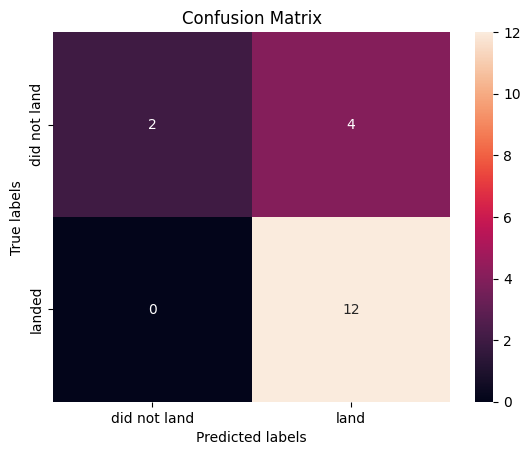

In [30]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, knn_yhat)

### Random Forest

In [31]:
parameters = {'n_estimators': [100, 200, 400],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'bootstrap': [True, False]
            }
RF = RandomForestClassifier()

In [32]:
rf_cv = GridSearchCV(RF, parameters, cv=10)
rf_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ", rf_cv.best_params_)
print("accuracy :", rf_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'criterion': 'log_loss', 'n_estimators': 200}
accuracy : 0.8482142857142858


In [33]:
# Test Score
rf_accuracy = rf_cv.score(X_test, Y_test)
rf_accuracy

0.8333333333333334

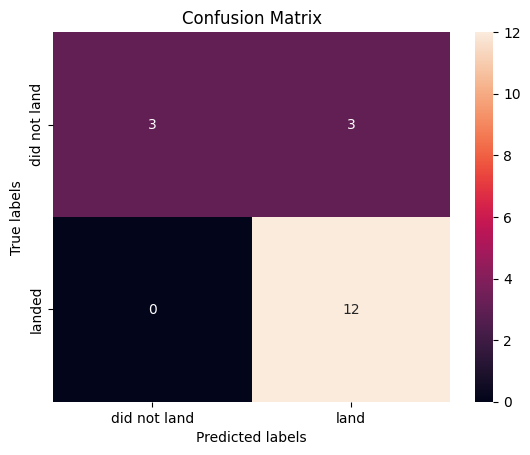

In [34]:
rf_yhat = rf_cv.predict(X_test)
plot_confusion_matrix(Y_test, rf_yhat)

## Selecting the Best Model using Model Evaluation


Find the method performs best:


c:\Users\Thej Venkat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Thej Venkat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Thej Venkat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Thej Venkat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Thej Venkat\AppData\Local\Programs\Python\Python311\Lib\site-packag

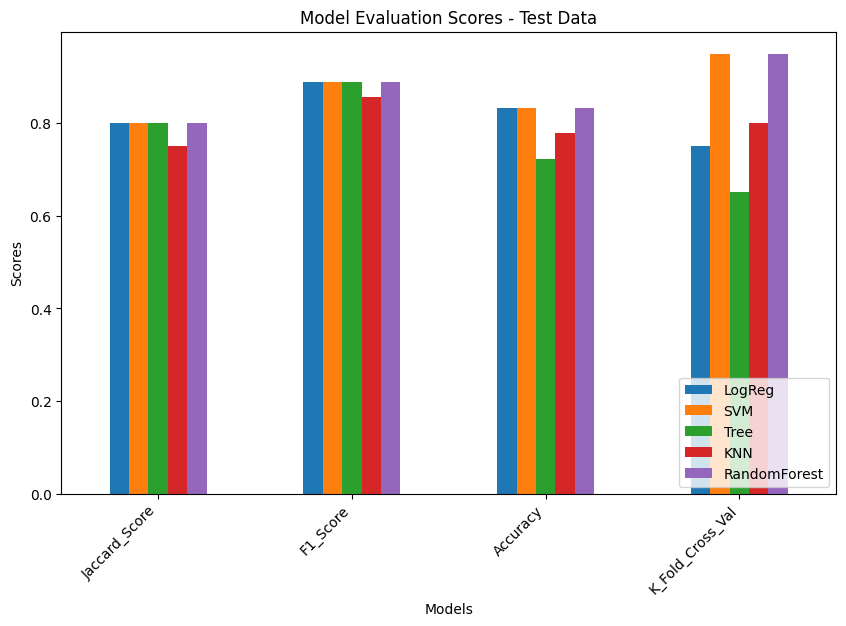

In [51]:
from sklearn.metrics import jaccard_score, f1_score
# k fold cross validation accuracy
from sklearn.model_selection import cross_val_score

# Examining the scores from Test sets
jaccard_scores = [
                  jaccard_score(Y_test, logreg_yhat, average='binary'),
                  jaccard_score(Y_test, svm_yhat, average='binary'),
                  jaccard_score(Y_test, tree_yhat, average='binary'),
                  jaccard_score(Y_test, knn_yhat, average='binary'),
                  jaccard_score(Y_test, rf_yhat, average='binary')
                 ]

f1_scores = [
             f1_score(Y_test, logreg_yhat, average='binary'),
             f1_score(Y_test, svm_yhat, average='binary'),
             f1_score(Y_test, tree_yhat, average='binary'),
             f1_score(Y_test, knn_yhat, average='binary'),
             f1_score(Y_test, rf_yhat, average='binary')
            ]

accuracy = [logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy, rf_accuracy]

k_cross_val_score = [
    np.mean(cross_val_score(logreg_cv.best_estimator_, X_test, Y_test, cv=10)),
    np.mean(cross_val_score(svm_cv.best_estimator_, X_test, Y_test, cv=10)),
    np.mean(cross_val_score(tree_cv.best_estimator_, X_test, Y_test, cv=10)),
    np.mean(cross_val_score(knn_cv.best_estimator_, X_test, Y_test, cv=10)),
    np.mean(cross_val_score(rf_cv.best_estimator_, X_test, Y_test, cv=10))
]

scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy, k_cross_val_score]), index=['Jaccard_Score', 'F1_Score', 'Accuracy', 'K_Fold_Cross_Val'] , columns=['LogReg', 'SVM', 'Tree', 'KNN', 'RandomForest'])

# Bar Graph representing the scores
scores.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Scores - Test Data')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.show()

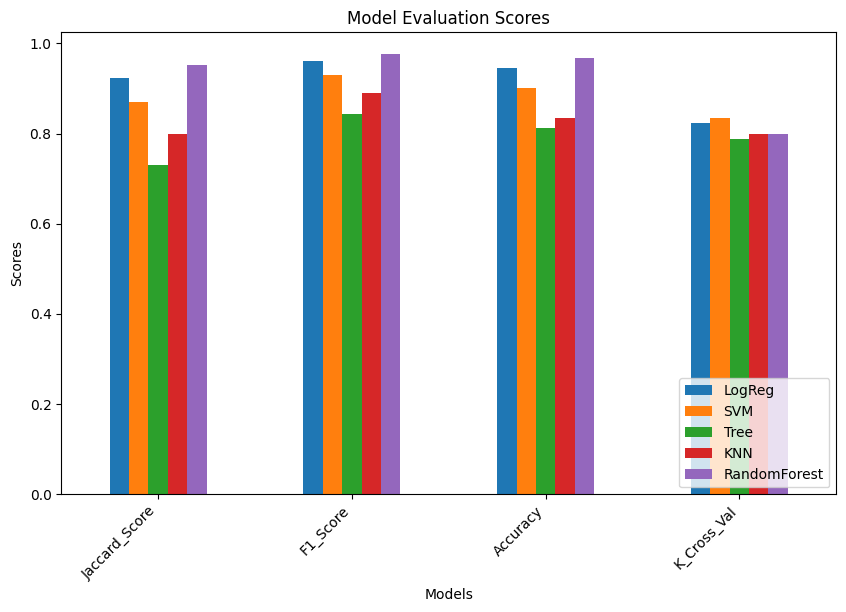

In [52]:
# Examining the scores from the whole Dataset
jaccard_scores = [
                  jaccard_score(Y, logreg_cv.predict(X), average='binary'),
                  jaccard_score(Y, svm_cv.predict(X), average='binary'),
                  jaccard_score(Y, tree_cv.predict(X), average='binary'),
                  jaccard_score(Y, knn_cv.predict(X), average='binary'),
                  jaccard_score(Y, rf_cv.predict(X), average='binary')
                 ]

f1_scores = [
             f1_score(Y, logreg_cv.predict(X), average='binary'),
             f1_score(Y, svm_cv.predict(X), average='binary'),
             f1_score(Y, tree_cv.predict(X), average='binary'),
             f1_score(Y, knn_cv.predict(X), average='binary'),
             f1_score(Y, rf_cv.predict(X), average='binary')
            ]

accuracy = [logreg_cv.score(X, Y), svm_cv.score(X, Y), tree_cv.score(X, Y), knn_cv.score(X, Y), rf_cv.score(X, Y)]

k_cross_val_score = [
    np.mean(cross_val_score(logreg_cv.best_estimator_, X, Y, cv=10)),
    np.mean(cross_val_score(svm_cv.best_estimator_, X, Y, cv=10)),
    np.mean(cross_val_score(tree_cv.best_estimator_, X, Y, cv=10)),
    np.mean(cross_val_score(knn_cv.best_estimator_, X, Y, cv=10)),
    np.mean(cross_val_score(rf_cv.best_estimator_, X, Y, cv=10))
]

scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy, k_cross_val_score]),
                      index=['Jaccard_Score', 'F1_Score', 'Accuracy', 'K_Cross_Val'],
                      columns=['LogReg', 'SVM', 'Tree', 'KNN', 'RandomForest'])

# Bar Graph representing the scores
scores.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Scores')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.show()

## Conclusion

- Based on the scores of the Test Set, we can can see that Random Forest, Support Vector Machine and Logistic Regression perform the best but we cannot definitively conclude it.
- Since Same Test Set scores may be due to the small test sample size (18 samples). Therefore, we need to test all methods based on the whole Dataset.
- The scores of the whole Dataset confirm that the best model is the Random Forest followed by LogReg. This model has not only higher scores, but also the highest accuracy.

## Saving the Best Model using Pickle

In [37]:
import pickle
pickle.dump(rf_cv, open('falcon9_model.pkl', 'wb'))

The saved model can later be used to predict the landing outcome of the Falcon 9 first stage.